
# Word Embedding e Word2Vec


1. Introdução 

Primeiramente, este notebook apresenta a classe Word2VecUtilPortuguese, que oferece uma serie de ferramentas para trabalhar com dicionários de word Embedding. 
Posteriormente  utilizando um dataset contendo classificação CDD de livros associados com o titulo , autor e resumos a Word2VecUtilPortuguese é utilizada para taduzir o dataset em termos de Vetorial.



In [29]:
import Word2VecUtilPortuguese as wordvec

path = 'dicionario_vec50.csv'

wordVecDicionario = wordvec.Word2VecUtilPortuguese('dicionario_vec50.csv')

#print('Dimensão do vetor do didionario' ,    wordVecDicionario.vecSize) 



929603
50


# Palavra to vetor 


In [30]:
# teste palavra to vec 
vec = wordVecDicionario.wordtodense('casa')
len(vec)



array([-8.087840e-01, -2.344940e-01,  6.837990e-01, -3.552256e+00,
        2.660380e-01,  1.764880e-01, -8.301800e-02, -1.756600e+00,
        5.187320e-01,  7.874550e-01, -2.560460e-01,  5.267100e-01,
        2.626010e-01,  1.581000e-02,  4.528480e-01, -4.253290e-01,
       -1.091950e-01, -3.496000e-02, -3.325440e-01,  1.537287e+00,
        3.229070e-01, -6.341390e-01,  2.590570e-01, -3.703710e-01,
       -5.205270e-01, -4.843610e-01, -6.838160e-01, -9.480820e-01,
       -4.697990e-01,  1.852468e+00,  7.642130e-01,  2.127000e-03,
        2.985810e-01, -8.077000e-02, -3.647550e-01,  3.420010e-01,
        1.744480e-01, -5.170710e-01, -9.487810e-01,  8.373230e-01,
       -2.660080e-01,  3.273090e-01,  4.745350e-01, -5.496020e-01,
        2.931430e-01,  1.284411e+00, -6.722870e-01,  2.427270e-01,
        9.723310e-01, -7.579990e-01])

In [33]:
# teste palavra to vec 
vecFrase = wordVecDicionario.textToDense("maria foi a feira")
print(len(vecFrase))






200


# Comparando lista de palavras 

In [34]:
        
frases = ('maria foi a feira',
          'maria foi a praia',
          'maria pegou o carro',
          'Joana pegou o carro',
          'João caso com maria ',
          'este carro é rápido',
          'este moto é ligeira',
          'este caminhao é lento',
          )
        
import numpy as np
    
frase_vectors = np.array([wordVecDicionario.textToDense(pl) for pl in frases]) 

word_vectors = wordVecDicionario.textToDense(frases[0])
    


print(word_vectors.shape)    
print(frase_vectors.shape)    
    

(200,)
(8, 200)


In [35]:

import numpy as np


def impgrafico(frases, frase_vectors  ):
    from sklearn.decomposition import PCA   
    
    #vec = np.transpose(vec)        
    import matplotlib.pyplot as plt


    pca = PCA(n_components=2)
    vectwodim = PCA(n_components=2).fit_transform(frase_vectors)
    
    plt.style.use('ggplot')    
    plt.figure(figsize=(6,6))
    plt.scatter(vectwodim[:,0], vectwodim[:,1], edgecolors='k', c='r')
    
    i =0
    for frase, (x,y) in zip(frases, vectwodim):
        plt.text(x+0.05, y+0.05, i)
        i =i +1 
        
    i =0   
    for frase in frases:
        print(i, frase ) 
        i = i +1     
        
        
    plt.show()    


0 maria foi a praia
1 Joana conheceu o mar
2 menina viajou para belem
3 menino conheceu o mar
4 que garoto mais feio
5 este carro é rápido
6 este moto é ligeira
7 este caminhao é lento
8 aquele patinete é ágil
9 brasil pais do carnaval
10 argentina pais do churrasco


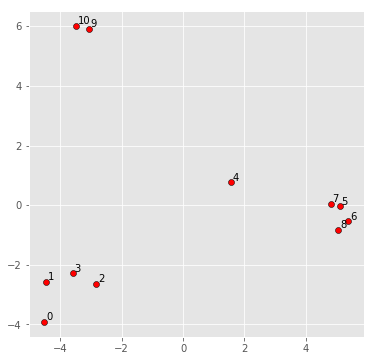

In [36]:
        
frases = ('maria foi a praia',
          'Joana conheceu o mar',
          'menina viajou para belem',
          'menino conheceu o mar',
          'que garoto mais feio',
          'este carro é rápido',
          'este moto é ligeira',
          'este caminhao é lento',
          'aquele patinete é ágil',
          'brasil pais do carnaval',
          'argentina pais do churrasco'
          
          )
        
import numpy as np
frase_vectors = np.array([wordVecDicionario.textToDense(pl) for pl in frases]) 
word_vectors = wordVecDicionario.textToDense(frases[0])
impgrafico(frases , frase_vectors  )    
    





Classificação CDD 

A Classificação Decimal de Dewey (em inglês: Dewey Decimal Classification; DDC ou CDD) é um sistema de classificação documentária desenvolvido pelo bibliotecário americano Melvil Dewey (1851–1931).
a Classificação CDD é amplamente utilizada em bibliotecas e seu proposito é reunir e organizar para para o docuemnto ser "achavel". 
https://pt.wikipedia.org/wiki/Classifica%C3%A7%C3%A3o_decimal_de_Dewey

A CDD trabalha em de forma hierarquica, onde se pode aprofudar a classificação seguinto temas e sub temas, sendo o primeito nível apresenftado seguir: 
000 Generalidades
100 Filosofia
200 Religião
300 Ciências sociais
400 Línguas
500 Ciências puras
600 Ciências aplicadas
700 Artes
800 Literatura
900 História e geografia

Para realizar um software capaz de prever a CDD de um livro com base no titulo, autor e assunto. Por meio de Spiders nos juntamso em um dataset contendo a descrição dos livros e sua respectiva classificação nas base da dados da rede de bibliotecca de sâo paulo : http://bibliotecacircula.prefeitura.sp.gov.br/pesquisa/ ' na bibloteca Nacional   http://acervo.bn.br/sophia_web/index.html. 

A ideia é realizar a biblioteca Word2VecUtilPortuguese para regerar o dataset onde os titulos, autorese resumos serão codificados verorialmente.



In [38]:
# primeiramente vamos abrris o data set 
import pandas as pd
pathclas = '/home/desenvolvimento/python/dataset/producao/resumoclassificacaio.csv' # open dense dictionary
dataclasssificacao = pd.read_csv(pathclas);
print (dataclasssificacao.shape)
print(dataclasssificacao.iloc[0, 1] )  # classificacao CDD 
print(dataclasssificacao.iloc[0, 2] )  # titulo autor abstract 


(45963, 3)


In [45]:
def encodeLinha(classificacao, texto):
    # paga a primeira parte numeria da classificaçao 
    import re
    clas = re.findall(r'\d+', classificacao)
    int_cdd = int(clas[0])
    word_vectors = wordVecDicionario.textToDense(texto)
    
    vetorstr = ', '.join(str(x) for x in word_vectors)
    linha = str(int_cdd) + ', ' + vetorstr + "\n";
    return  int_cdd, linha


classificacao = dataclasssificacao.iloc[1, 1]   # classificacao CDD 
descricao = dataclasssificacao.iloc[1, 2]  # titulo autor abstract 
print ( classificacao, descricao)
cdd , linha = encodeLinha(classificacao, descricao)
print (  linha)



371.30981  "Didática	 Libâneo; José Carlos; 1945-	 Este livro propõe o estudo sistemático da Didática como teoria do processo de ensino. Como disciplina integradora; busca conhecimentos teóricos e práticos de metodologias específicas das matérias de ensino; generalizando princípios para a docência de todas as matérias escolares."
- 1945
371, 0.2475, -0.45712200000000003, -0.9959, -0.094195, 1.011364, -0.37666, 0.205071, 0.262152, 0.626744, 0.348, -0.290032, -0.394515, 0.029237, -0.30990100000000004, 0.4195, 0.041214999999999995, -0.304198, -0.7767729999999999, -0.129223, 0.45512299999999994, 0.369442, -0.252309, -0.848454, -0.645237, 0.793141, 0.7176130000000001, -0.478246, -0.600404, -0.405529, -0.33920700000000004, 0.12376300000000001, 0.303433, 0.28176799999999996, -1.031223, -1.078015, -0.42346999999999996, -0.03766, 0.5185609999999999, -0.553769, 0.117775, 0.36577, 0.362713, 0.21856799999999998, -0.23086399999999999, -0.30753800000000003, -1.531526, -0.487325, -0.13536700000000002

In [ ]:
# export o data set vetorializado 
nlinhas =dataclasssificacao.shape[0]  

pathoutput = '/home/desenvolvimento/python/dataset/producao/CddVector.csv'

f = open(pathoutput, "a")
texto = ''
for i in range(nlinhas) :
    classificacao = dataclasssificacao.iloc[i, 1]
    texto = dataclasssificacao.iloc[i, 2]
    cdd , linha = encodeLinha(classificacao, texto)
    f.write(linha)
    
        
        





- 1928
- 1999
- 1945
- 1954
- 1954
- 1930
- 2015
- 1916
- 2014
- manoelês
- 1920
- 1936
- 1979
- 1941
- 1939
- àqueles
- 1935
- 1970
- 1963
- enems
- 1941
- 2015
- 1908
- 1967
- 1936
- 1961
- 1928
- 2014
- 1967
- 1922
- 2010
- 1932
- 1809
- 1882
- 1970
- 1902
- 1982
- gravitacao
- 1952
- 1922
- 1997
- 1954
- mba’s
- 1956
- 1829
- 1877
- 1953
- 1839
- 1908
- 1939
- 1926
- 2012
- negociacao
- 1968
- 1948
- 1921
- vizzioli
- historiosofia
- 1948
- 1946
- 1964
- toupeirinha
- 1994
- 1930
- 1938
- 1938
- psicossociológica
- 1948
- 2006
- 1850
- 1894
- 1878
- cervennes
- 1879
- 1883
- 1886
- 1888
- 1894
- 1881
- 1797
- 1851
- 1797
- 1851
- 1960
- sorumbatica
- 1948
- maldadade
- odilia
- 1927
- plus®
- statdisk
- 1948
